In [1]:
    #Project Titanic Case

# Project Titanic Case
## 1. Data

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_train = pd.read_csv("./train.csv")
test_test = pd.read_csv("./test.csv")


In [4]:
train_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_test.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Note:
-SibSp:# of siblings/ spouses aboard the Titanic
-Parch:# of parents / children aboard the Titanic
-ticket:Ticket number
-Cabin: Cabin number

#### Note:
>
>-SibSp:# of siblings/ spouses aboard the Titanic 
>-Parch:# of parents / children aboard the Titanic 
>-ticket:Ticket number 
>-Cabin: Cabin number

In [6]:
train_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### PassengerID
The first column is the passengerID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we need to train the model. Let's make it the index instead.

In [8]:
train_train.set_index(train_train.PassengerId, inplace = True)

In [9]:
train_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_train.drop('PassengerId', axis = 1, inplace = True)

In [11]:
train_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df = pd.read_csv("./test.csv", index_col = "PassengerId")


In [13]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 1.1 Feature Classification: Categorical vs Numerical
* This help us select the appropriate plots for visualization

#### Which features are categorical
* Categorical Features: `nominal`, `ordinal`, `ratio`, `interval`.
* To classify the samples into sets of similar samples

#### Which features are numerical
* Numerical features: `discrete`, `continuous`, `timeseries`.
* These values change from sample to sample


In [15]:
train_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass(ordinal)`, `SibSp`, `Parch`.
* Numerical: `Age`, `Fare`(discrete)
* Mix types of data: `Ticket`, `Cabin`
* Contain Error/Type: `Name`
* Blank or Null: `Cabin` > `Age` > `Embarked`
* Various data type: string int float

According to the data dictionary, we know that if a passenger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, whici is a numerical type. We can change that with the following command:

In [17]:
train_train["Survived"]= train_train["Survived"].astype("category")

In [18]:
train_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [19]:
train_train["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [23]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
        
convert_cat(train_train,features)
convert_cat(test_df,features)

train_train.info()
test_df.info()

## 1.1.1 Distribution of Numerical feature values across the samples

train_train.describe()

## 1.1.2 Distribution of Categorical Features

In [26]:
train_train.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 2.Exploratory Data Analysis (EDA)

### 3.1 Colerrating categorical features:
* Categorical: `Survived`, `Sex`, `Embarked`, `Pclass(ordinal)`, `SibSp`, `Parch`.
### Target variable: `Survived`

In [27]:
train_train["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [28]:
train_train["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Conclusion: Only `38%` survived the disaster. So the data training is suffered from data imbalance but it is not severe so no sampling data process will be done here.

### `sex`


In [30]:
train_train["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [31]:
train_train["Sex"].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

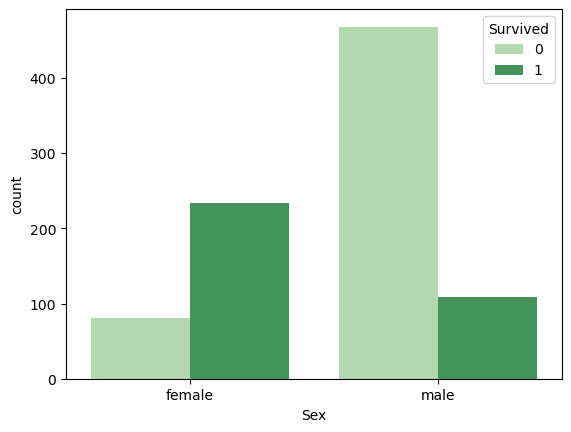

In [36]:
sns.countplot(data=train_train, x= 'Sex',hue='Survived', palette="Greens")

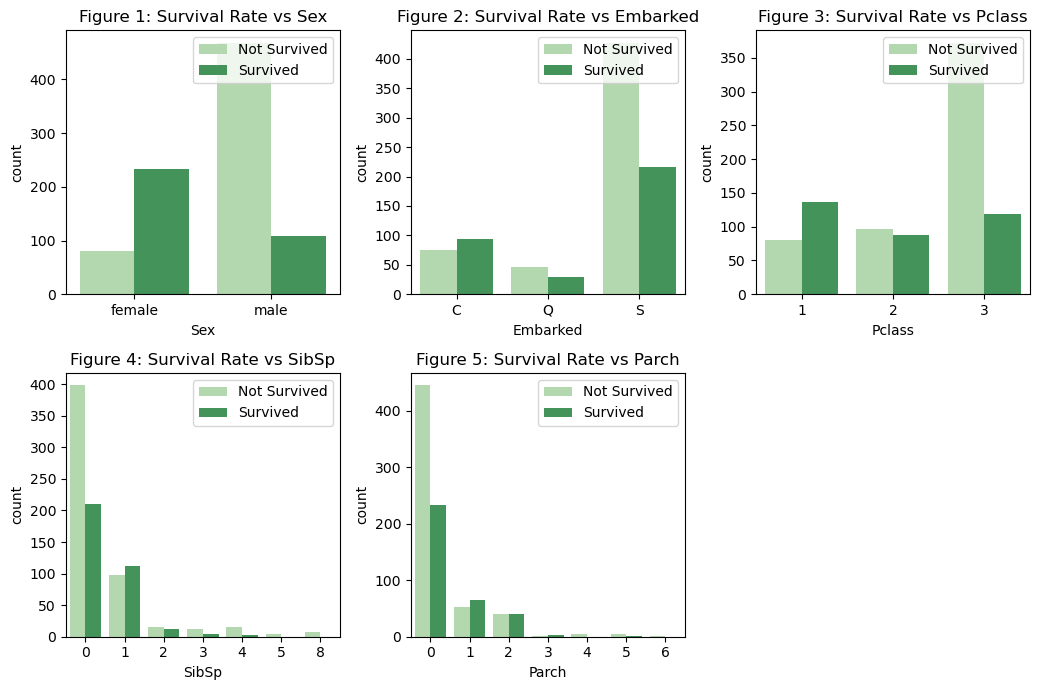

In [47]:
col = ["Sex", "Embarked",'Pclass','SibSp', 'Parch']

n_rows= 2
n_cols= 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0, n_rows):
    for c in range(0,n_cols):
        i = r*n_cols+c; # loop through each index
        if i < len(col):
            ax_i = ax[r,c]
            sns.countplot(data= train_train, x=col[i], hue="Survived", palette="Greens", ax =ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {col[i]}")
            ax_i.legend(title='', loc='upper right', labels={'Survived', 'Not Survived'})
ax.flat[-1].set_visible(False) #Remove the last subplot
            
plt.tight_layout()
plt.show()